In [1]:
import numpy as np 
import glob 
import matplotlib.pyplot as plt
import glob
import torch

In [2]:
hessian_path =  "/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/{n_samples}/layer_0/mlp.down_proj.pt"

paths = glob.glob(hessian_path.format(n_samples="*"))
print(paths)
#sort the paths by the number of samples
fn_get_samples = lambda s: int(s.split("/")[-3])
paths = sorted(paths, key=fn_get_samples)
min_n_samples = -1
paths = [p for p in paths if fn_get_samples(p) >= min_n_samples]
print(paths)

#use the last path as the reference
reference_path = paths[-1]
reference_hessian = torch.load(reference_path, map_location="cpu")["hessian"]


#load the other hessians
other_hessians = [torch.load(p, map_location="cpu")["hessian"] for p in paths[:-1]]


['/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/8/layer_0/mlp.down_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/128/layer_0/mlp.down_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/1024/layer_0/mlp.down_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/16/layer_0/mlp.down_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/2048/layer_0/mlp.down_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/4/layer_0/mlp.down_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/4096/layer_0/mlp.down_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/512/layer_0/mlp.down_proj.pt', '/data/lliu/huffman/models/meta-llama/Llama-2-7b-hf/hessians_new/seed_0/pajama/1/layer_0/mlp.down_proj.pt', '/data/lliu/h

/tmp/ipykernel_5260/1553404799.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  reference_hessian = torch.load(reference_path, map_location="cpu")["hessian"]
/tmp/ipyker

In [3]:
#get the relative differences between the reference and the other hessians
differences = [torch.abs((hessian - reference_hessian)/reference_hessian) for hessian in other_hessians]

#get the differences along the diagonal
diagonal_diffs = [torch.diag(d) for d in differences]





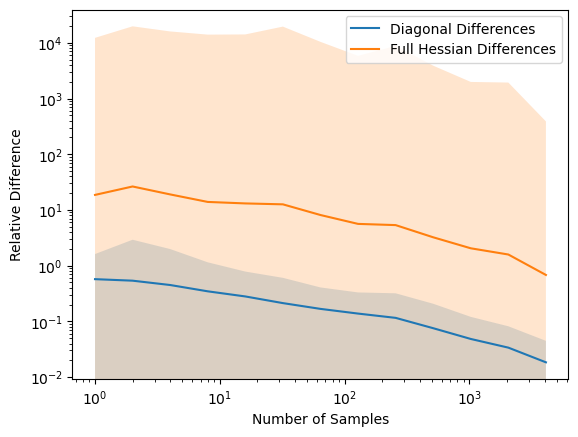

In [4]:
def plot_differences_mean_and_std(diagonal_diffs, n_samples, label = None):
    mean_diffs = [d.mean().item() for d in diagonal_diffs]
    std_diffs = [d.std().item() for d in diagonal_diffs]
    plt.plot(n_samples, mean_diffs, label=label)  

    #color and fill the area around the mean
    plt.fill_between(n_samples, [m-s for m,s in zip(mean_diffs, std_diffs)], [m+s for m,s in zip(mean_diffs, std_diffs)], alpha=0.2)

fig = plt.figure()
n_samples = [fn_get_samples(p) for p in paths[:-1]]

plot_differences_mean_and_std(diagonal_diffs, n_samples, label="Diagonal Differences")
plot_differences_mean_and_std(differences, n_samples, label="Full Hessian Differences")
plt.xlabel("Number of Samples")
plt.ylabel("Relative Difference")
plt.yscale("log")
plt.xscale("log")
plt.legend()

[0.3028453513979912, 0.2074498012661934, 0.17264281958341599, 0.12385434471070766, 0.09399593248963356, 0.05827204044908285, 0.05115191079676151, 0.03824396897107363, 0.026831633877009153, 0.018735024146735668, 0.012590419733896852, 0.008675103075802326, 0.004740490112453699]
[0.6744775772094727, 0.5979534536600113, 0.5132323801517487, 0.4298816844820976, 0.3496258780360222, 0.24870410934090614, 0.20435111597180367, 0.17106002196669579, 0.13239672034978867, 0.08885329961776733, 0.0585850877687335, 0.041294497437775135, 0.021851683035492897]
[0.50303775, 0.39143065, 0.33674884, 0.25758776, 0.2009286, 0.13359198, 0.11155769, 0.08628828, 0.062197976, 0.043678615, 0.029213045, 0.020290451, 0.010837018]
[0.6114645004272461, 0.7079435586929321, 0.5542405843734741, 0.41771387308835983, 0.36718127131462097, 0.2877655625343323, 0.21816494688391685, 0.16779054701328278, 0.12892121076583862, 0.08974837511777878, 0.056477601639926434, 0.039533261209726334, 0.021499423310160637]
[3.4803372025489807

([<matplotlib.axis.XTick at 0x7f8267d79d50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(8, 0, '8'),
  Text(16, 0, '16'),
  Text(32, 0, '32'),
  Text(64, 0, '64'),
  Text(128, 0, '128'),
  Text(256, 0, '256'),
  Text(512, 0, '512'),
  Text(1024, 0, '1024'),
  Text(2048, 0, '2048'),
  Text(4096, 0, '4096')])

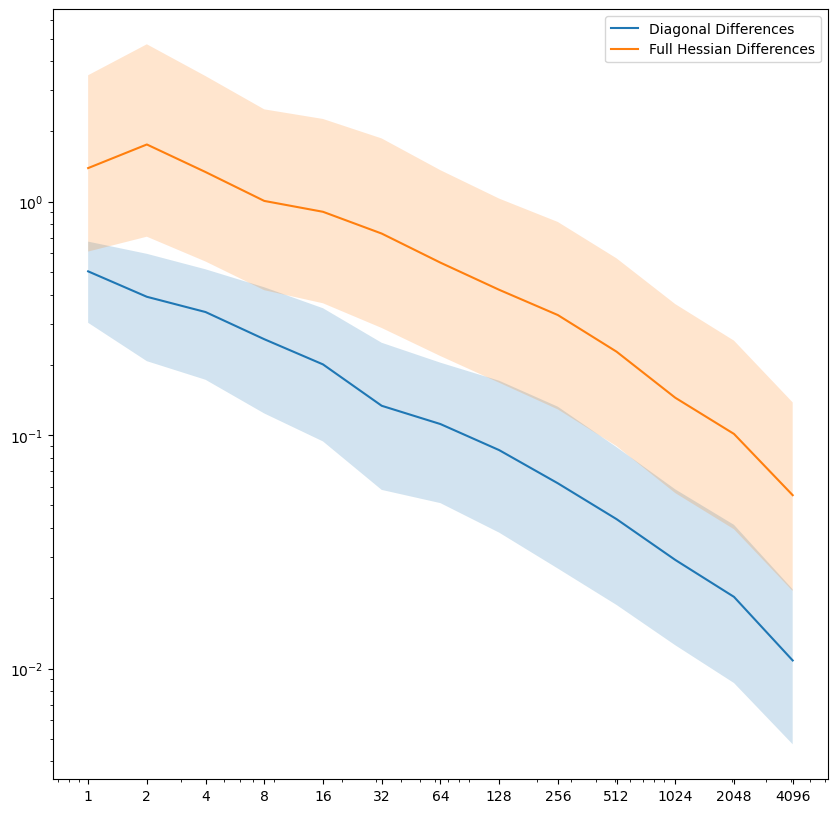

In [ ]:
def plot_differences_mean_and_50_band(diagonal_diffs, n_samples, label = None):
    median_diffs = [np.median(d.numpy()) for d in diagonal_diffs]
    plt.plot(n_samples, median_diffs, label=label)  

    #get the 50% band
    lower_band = [np.percentile(d.numpy(), 25) for d in diagonal_diffs]
    upper_band = [np.percentile(d.numpy(), 75) for d in diagonal_diffs]
    print(lower_band)
    print(upper_band)
    print(median_diffs)
    plt.fill_between(n_samples, lower_band, upper_band, alpha=0.2)
    
fig = plt.figure(figsize=(10, 10))
plot_differences_mean_and_50_band(diagonal_diffs, n_samples, label="Diagonal Differences")
plot_differences_mean_and_50_band(differences, n_samples, label="Full Hessian Differences")
plt.xscale("log")
plt.xlabel("Number of Samples")
plt.ylabel("Relative Difference")
plt.yscale("log")
plt.legend()

#set the xticks to be the number of samples
plt.xticks(n_samples, n_samples)
    

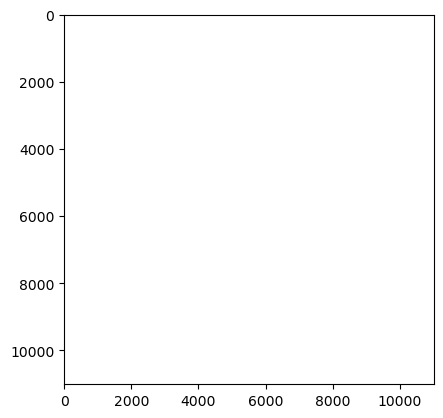

In [8]:
norm_0 = torch.norm(reference_hessian, p=2, dim=1)

reference_hessian = reference_hessian/norm_0[:, None]

plt.imshow(torch.log(reference_hessian).numpy())

In [9]:
reference_hessian

tensor([[ 1.4176e-01,  7.6975e-04,  2.1846e-03,  ..., -1.1150e-03,
          1.2363e-03,  3.9886e-03],
        [ 3.4919e-03,  3.1335e-01,  1.6402e-02,  ...,  5.4151e-04,
         -1.5657e-03,  1.2606e-02],
        [ 3.0933e-03,  5.1195e-03,  2.1930e-01,  ...,  3.2927e-05,
          1.3076e-03, -2.2402e-03],
        ...,
        [-2.2289e-03,  2.3861e-04,  4.6483e-05,  ...,  3.8109e-01,
         -3.8416e-03, -5.6946e-03],
        [ 2.9346e-03, -8.1922e-04,  2.1919e-03,  ..., -4.5618e-03,
          1.8575e-01, -1.7088e-03],
        [ 6.8868e-03,  4.7981e-03, -2.7317e-03,  ..., -4.9188e-03,
         -1.2430e-03,  3.0428e-01]])